# Test notebook 

In [2]:
import functions as fun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the data from the file *"your_dataset.csv"*:

In [3]:
# Load the data
data = pd.read_csv('../Data/your_dataset.csv')
data = data.sample(n=1000, random_state=45)
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
4132,3.883319,-0.295356,100.660587,-0.177386,0.668144,-0.523501,-1.792591,3.837379,1.087069,-56.053003,-1
6553,1.345904,0.711837,100.489085,-1.896468,-0.879170,-0.624997,3.141346,-4.197281,-1.916178,-56.133379,-1
7604,0.487493,0.417728,100.708889,-0.677101,0.031818,-0.754141,4.254757,2.096358,-1.410622,-56.274391,-1
585,0.513407,-1.046240,98.896871,-0.129357,-0.963354,0.875551,-1.769780,1.800442,-1.895149,-54.482139,-1
5924,1.399891,2.789066,100.640192,-0.358410,0.933793,-0.910845,0.049392,1.176121,0.461156,-56.528246,1


### Train and Test the Perceptron Algorithm: 


In [4]:
zol_training_perceptron=[]
zol_test_perceptron=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train = fun.perceptron(x_train, y_train, 0.01, 500)
    # Calculate the 0-1 loss on the training set
    zol_training_perceptron.append(fun.zero_one_loss(prediction_train[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test = np.sign(np.dot(x_test, prediction_train[0])) # Predict the test set
    zol_test_perceptron.append(fun.zero_one_loss(prediction_test, y_test, y_test.shape[0]))
    

### Train and Test the Pegasos algorithm:

In [5]:
zol_training_pegasos=[]
zol_test_pegasos=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train_pegasos = fun.pegasos(x_train, y_train, 0.01, 100, 100)
    # Calculate the 0-1 loss on the training set
    zol_training_pegasos.append(fun.zero_one_loss(prediction_train_pegasos[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_pegasos = np.sign(np.dot(x_test, prediction_train_pegasos[0])) # Predict the test set
    zol_test_pegasos.append(fun.zero_one_loss(prediction_test_pegasos, y_test, y_test.shape[0]))


### Train and test Regularized Logistic Classification:

In [6]:
zol_training_rlc=[]
zol_test_rlc=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train_rlc = fun.regularized_logistic(x_train, y_train, 0.1, 100, 100)
    # Calculate the 0-1 loss on the training set
    zol_training_rlc.append(fun.zero_one_loss(prediction_train_rlc[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_rlc = np.sign(np.dot(x_test, prediction_train_rlc[0])) # Predict the test set
    zol_test_rlc.append(fun.zero_one_loss(prediction_test_rlc, y_test, y_test.shape[0]))

#### Graphical representation of the 0-1 loss for the Perceptron, Pegasos and RLC algorithms:

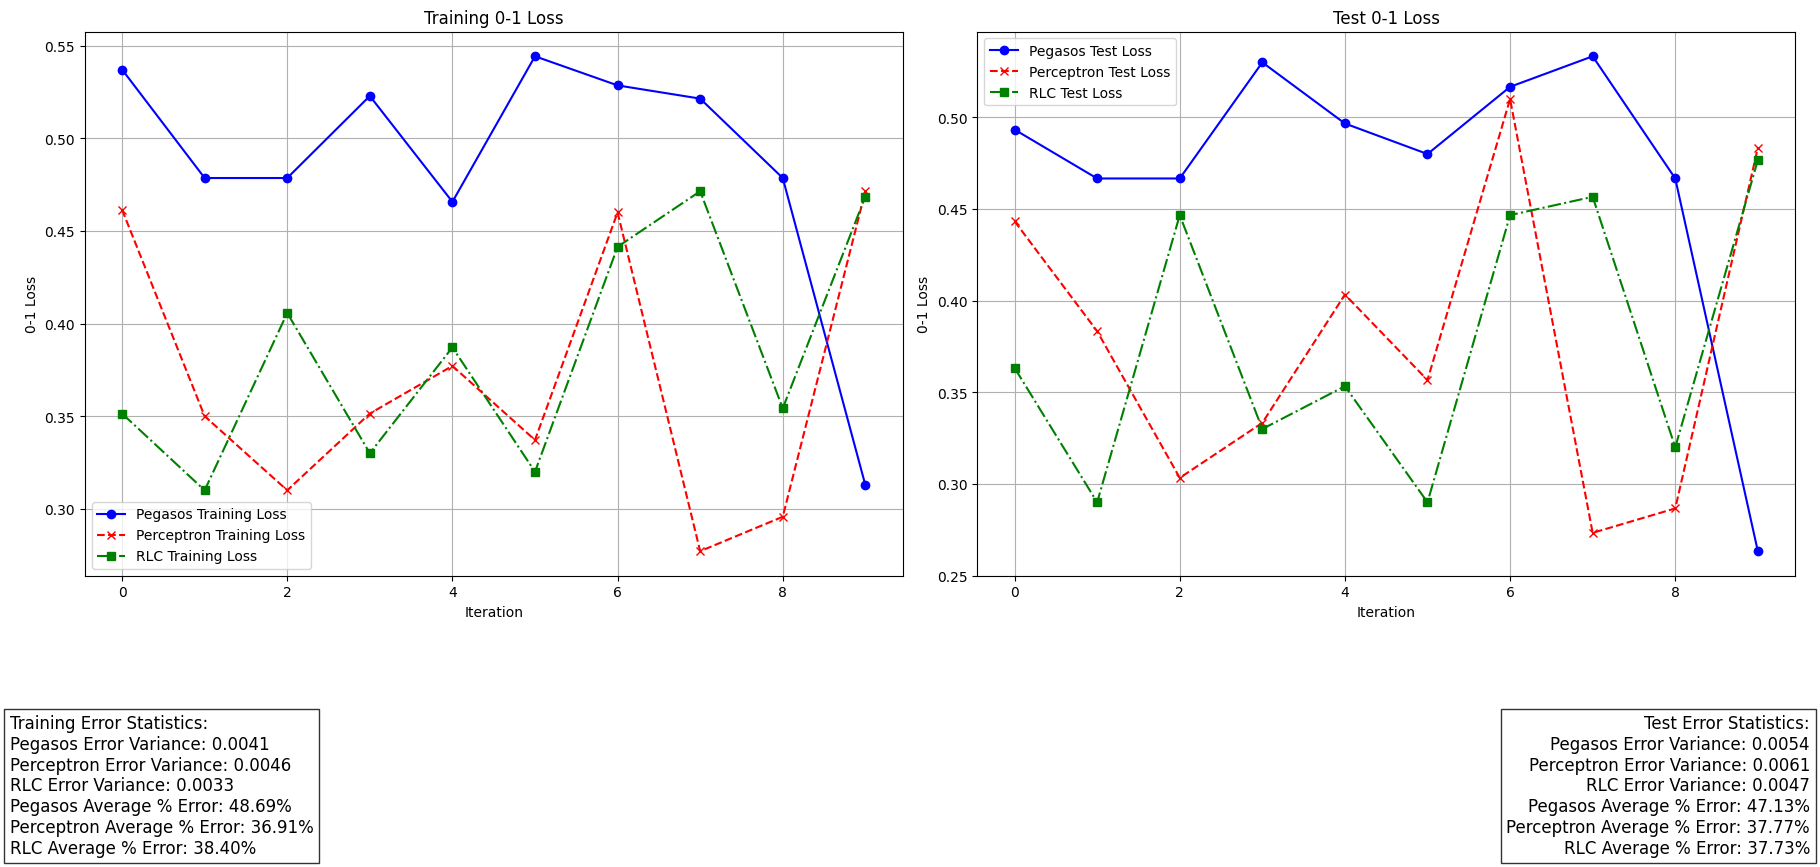

In [7]:
# Calculate variance and average percentage
variance_zol_training_pegasos = np.var(zol_training_pegasos)
average_zol_training_pegasos_percentage = np.mean(zol_training_pegasos) * 100
variance_zol_test_pegasos = np.var(zol_test_pegasos)
average_zol_test_pegasos_percentage = np.mean(zol_test_pegasos) * 100

variance_zol_training_perceptron = np.var(zol_training_perceptron)
average_zol_training_perceptron_percentage = np.mean(zol_training_perceptron) * 100
variance_zol_test_perceptron = np.var(zol_test_perceptron)
average_zol_test_perceptron_percentage = np.mean(zol_test_perceptron) * 100

variance_zol_training_rlc = np.var(zol_training_rlc)
average_zol_training_rlc_percentage = np.mean(zol_training_rlc) * 100
variance_zol_test_rlc = np.var(zol_test_rlc)
average_zol_test_rlc_percentage = np.mean(zol_test_rlc) * 100

# Plotting
plt.figure(figsize=(18, 8))

# Training Loss Graph
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(zol_training_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Training Loss')
plt.plot(zol_training_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Training Loss')
plt.plot(zol_training_rlc, marker='s', linestyle='-.', color='g', label='RLC Training Loss')

plt.title('Training 0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()

# Test Loss Graph
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(zol_test_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Test Loss')
plt.plot(zol_test_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Test Loss')
plt.plot(zol_test_rlc, marker='s', linestyle='-.', color='g', label='RLC Test Loss')

plt.title('Test 0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()


plt.figtext(0, 0.1, 
            f'Training Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_training_pegasos:.4f}\n'
            f'Perceptron Error Variance: {variance_zol_training_perceptron:.4f}\n'
            f'RLC Error Variance: {variance_zol_training_rlc:.4f}\n'
            f'Pegasos Average % Error: {average_zol_training_pegasos_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_training_perceptron_percentage:.2f}%\n'
            f'RLC Average % Error: {average_zol_training_rlc_percentage:.2f}%', 
            ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.figtext(1, 0.1, 
            f'Test Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_test_pegasos:.4f}\n'
            f'Perceptron Error Variance: {variance_zol_test_perceptron:.4f}\n'
            f'RLC Error Variance: {variance_zol_test_rlc:.4f}\n'
            f'Pegasos Average % Error: {average_zol_test_pegasos_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_test_perceptron_percentage:.2f}%\n'
            f'RLC Average % Error: {average_zol_test_rlc_percentage:.2f}%', 
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to provide extra space for annotations
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjusts subplot parameters to fit the text

# Show the plots
plt.show()

### Hypertuning

In [8]:
perceptron_param_grid = {
    'n': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 500],
}

pegasos_param_grid = {
    'lam': [0.01, 0.1, 1],
    'epochs': [50, 100, 500],
    'batch_size': [100, 500]
}

logistic_param_grid = {
    'lam': [0.01, 0.1, 1],
    'epochs': [50, 100, 500],
    'batch_size': [100, 500]
}

# Split the data
x_train, x_test, y_train, y_test = fun.split_data(data)

# Perform grid search for each model
best_perceptron_params, best_perceptron_loss = fun.grid_search(x_train, y_train, 'perceptron', perceptron_param_grid)
best_pegasos_params, best_pegasos_loss = fun.grid_search(x_train, y_train, 'pegasos', pegasos_param_grid)
best_logistic_params, best_logistic_loss = fun.grid_search(x_train, y_train, 'logistic', logistic_param_grid)

print(f"Best Perceptron Params: {best_perceptron_params} with Loss: {best_perceptron_loss}")
print(f"Best Pegasos Params: {best_pegasos_params} with Loss: {best_pegasos_loss}")
print(f"Best Logistic Params: {best_logistic_params} with Loss: {best_logistic_loss}")

# Train final models with the best hyperparameters and evaluate on the test set
w_perceptron, y_pred_perceptron = fun.perceptron(x_train, y_train, best_perceptron_params['n'], best_perceptron_params['epochs'])
w_pegasos, y_pred_pegasos = fun.pegasos(x_train, y_train, best_pegasos_params['lam'], best_pegasos_params['epochs'], best_pegasos_params['batch_size'])
w_logistic, y_pred_logistic = fun.regularized_logistic(x_train, y_train, best_logistic_params['lam'], best_logistic_params['epochs'], best_logistic_params['batch_size'])

test_loss_perceptron = fun.zero_one_loss(np.sign(np.dot(x_test, w_perceptron)), y_test, len(y_test))
test_loss_pegasos = fun.zero_one_loss(np.sign(np.dot(x_test, w_pegasos)), y_test, len(y_test))
test_loss_logistic = fun.zero_one_loss(np.sign(np.dot(x_test, w_logistic)), y_test, len(y_test))

print(f"Perceptron Test Loss: {test_loss_perceptron}")
print(f"Pegasos Test Loss: {test_loss_pegasos}")
print(f"Logistic Test Loss: {test_loss_logistic}")

Best Perceptron Params: {'n': 0.001, 'epochs': 500} with Loss: 0.4428571428571429
Best Pegasos Params: {'lam': 0.01, 'epochs': 500, 'batch_size': 100} with Loss: 0.41714285714285715
Best Logistic Params: {'lam': 1, 'epochs': 500, 'batch_size': 100} with Loss: 0.3057142857142857
Perceptron Test Loss: 0.4633333333333333
Pegasos Test Loss: 0.4666666666666667
Logistic Test Loss: 0.3


## Polynomial Features Expansion of Degree 2

Expand the data to include polynomial features of degree 2:

In [9]:
expanded_data = fun.polynomial_feature_expansion(data)
expanded_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x7*x8,x7*x9,x7*x10,x8^2,x8*x9,x8*x10,x9^2,x9*x10,x10^2,y
4132,3.883319,-0.295356,100.660587,-0.177386,0.668144,-0.523501,-1.792591,3.837379,1.087069,-56.053003,...,-6.878850,-1.948671,100.480107,14.725474,4.171497,-215.096591,1.181720,-60.933503,3141.939125,-1
6553,1.345904,0.711837,100.489085,-1.896468,-0.879170,-0.624997,3.141346,-4.197281,-1.916178,-56.133379,...,-13.185112,-6.019378,-176.334346,17.617171,8.042739,235.607588,3.671739,107.561553,3150.956279,-1
7604,0.487493,0.417728,100.708889,-0.677101,0.031818,-0.754141,4.254757,2.096358,-1.410622,-56.274391,...,8.919491,-6.001853,-239.433837,4.394715,-2.957168,-117.971242,1.989854,79.381895,3166.807104,-1
585,0.513407,-1.046240,98.896871,-0.129357,-0.963354,0.875551,-1.769780,1.800442,-1.895149,-54.482139,...,-3.186387,3.353997,96.421413,3.241592,-3.412106,-98.091944,3.591588,103.251751,2968.303452,-1
5924,1.399891,2.789066,100.640192,-0.358410,0.933793,-0.910845,0.049392,1.176121,0.461156,-56.528246,...,0.058091,0.022778,-2.792063,1.383262,0.542376,-66.484080,0.212665,-26.068354,3195.442564,1


### Hyperparameter Tuning with Polynomial Features

In [10]:
perceptron_param_grid = {
    'n': [0.01, 0.1],
    'epochs': [100, 500]
}

pegasos_param_grid = {
    'lam': [0.01, 0.1],
    'epochs': [100, 500],
    'batch_size': [100, 500]
}

logistic_param_grid = {
    'lam': [0.01, 0.1],
    'epochs': [100, 500],
    'batch_size': [100, 500]
}

# Split the data
x_train, x_test, y_train, y_test = fun.split_data(expanded_data)

# Perform grid search for each model
best_perceptron_params, best_perceptron_loss = fun.grid_search(x_train, y_train, 'perceptron', perceptron_param_grid)
best_pegasos_params, best_pegasos_loss = fun.grid_search(x_train, y_train, 'pegasos', pegasos_param_grid)
best_logistic_params, best_logistic_loss = fun.grid_search(x_train, y_train, 'logistic', logistic_param_grid)

print(f"Best Perceptron Params: {best_perceptron_params} with Loss: {best_perceptron_loss}")
print(f"Best Pegasos Params: {best_pegasos_params} with Loss: {best_pegasos_loss}")
print(f"Best Logistic Params: {best_logistic_params} with Loss: {best_logistic_loss}")

Best Perceptron Params: {'n': 0.01, 'epochs': 500} with Loss: 0.32285714285714284
Best Pegasos Params: {'lam': 0.1, 'epochs': 100, 'batch_size': 100} with Loss: 0.43285714285714283
Best Logistic Params: {'lam': 0.01, 'epochs': 500, 'batch_size': 500} with Loss: 0.27142857142857146


### Train final models with the best hyperparameters and evaluate on the test set
#### Perceptron

In [11]:
zol_training_perceptron=[]
zol_test_perceptron=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(expanded_data)
    
    # Run the prediction on the training set
    prediction_train = fun.perceptron(x_train, y_train, best_perceptron_params['n'], best_perceptron_params['epochs'])
    # Calculate the 0-1 loss on the training set
    zol_training_perceptron.append(fun.zero_one_loss(prediction_train[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test = np.sign(np.dot(x_test, prediction_train[0])) # Predict the test set
    zol_test_perceptron.append(fun.zero_one_loss(prediction_test, y_test, y_test.shape[0]))

#### Pegasos

In [12]:
zol_training_pegasos=[]
zol_test_pegasos=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(expanded_data)
    
    # Run the prediction on the training set
    prediction_train_pegasos = fun.pegasos(x_train, y_train, best_pegasos_params['lam'], best_pegasos_params['epochs'], best_pegasos_params['batch_size'])
    # Calculate the 0-1 loss on the training set
    zol_training_pegasos.append(fun.zero_one_loss(prediction_train_pegasos[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_pegasos = np.sign(np.dot(x_test, prediction_train_pegasos[0])) # Predict the test set
    zol_test_pegasos.append(fun.zero_one_loss(prediction_test_pegasos, y_test, y_test.shape[0]))

#### Regularized Logistic Classification

In [13]:
zol_training_rlc=[]
zol_test_rlc=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(expanded_data)
    
    # Run the prediction on the training set
    prediction_train_rlc = fun.regularized_logistic(x_train, y_train, best_logistic_params['lam'], best_logistic_params['epochs'], best_logistic_params['batch_size'])
    # Calculate the 0-1 loss on the training set
    zol_training_rlc.append(fun.zero_one_loss(prediction_train_rlc[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_rlc = np.sign(np.dot(x_test, prediction_train_rlc[0])) # Predict the test set
    zol_test_rlc.append(fun.zero_one_loss(prediction_test_rlc, y_test, y_test.shape[0]))

#### Graphical representation of the 0-1 loss for the Perceptron, Pegasos and RLC algorithms with Polynomial Features:

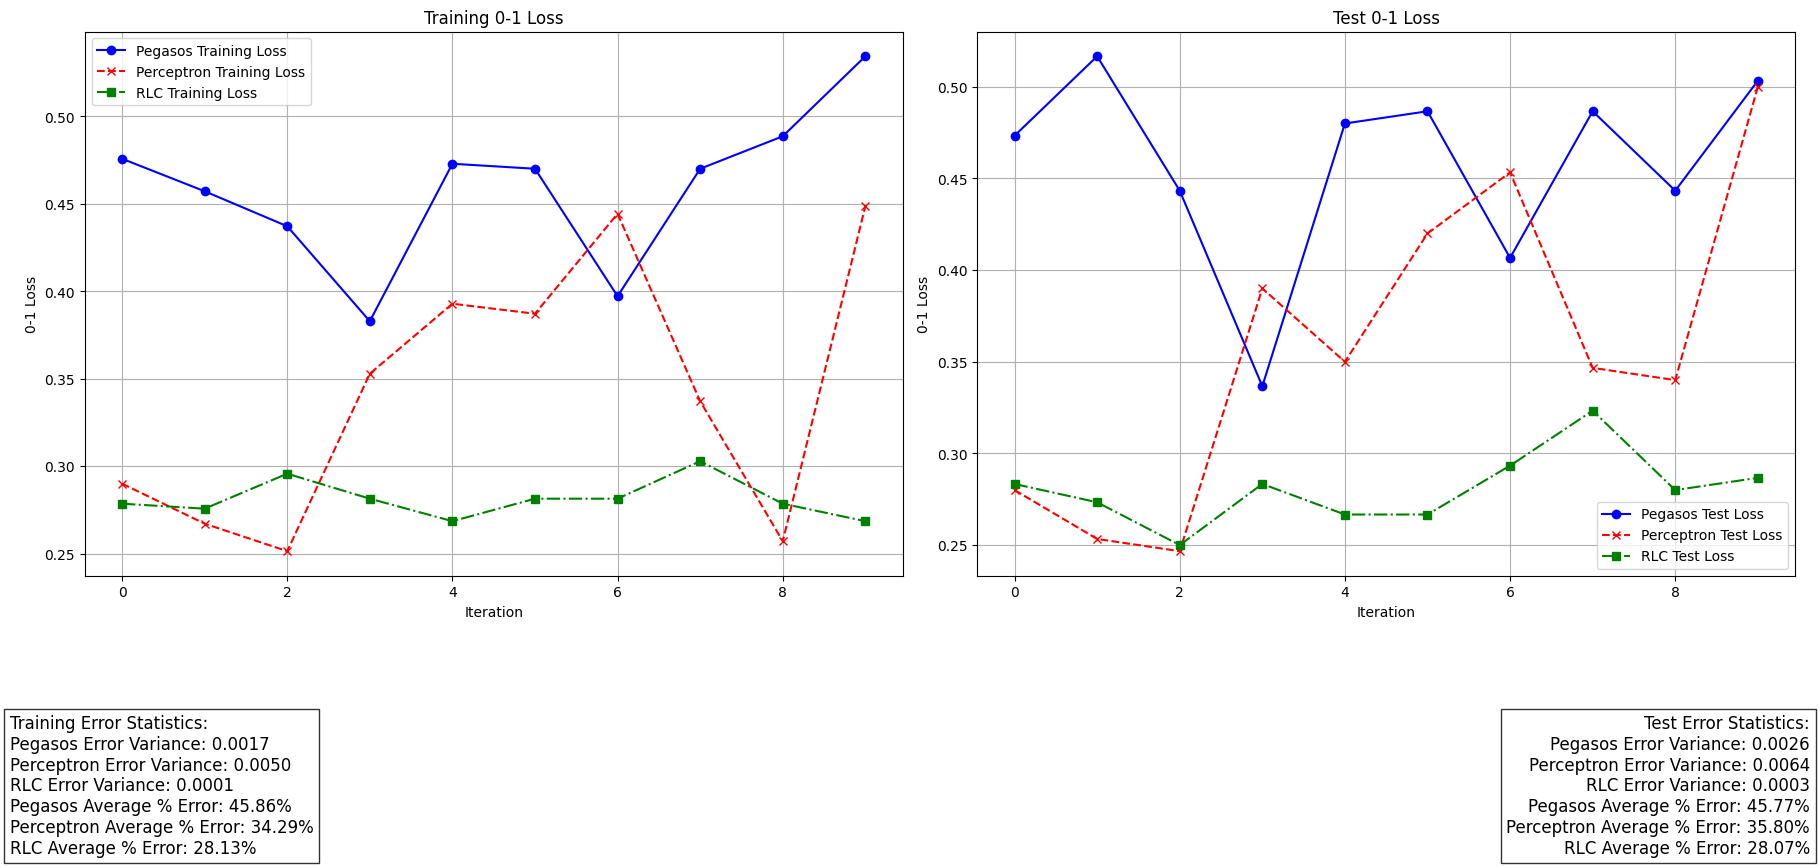

In [14]:
# Calculate variance and average percentage
variance_zol_training_pegasos = np.var(zol_training_pegasos)
average_zol_training_pegasos_percentage = np.mean(zol_training_pegasos) * 100
variance_zol_test_pegasos = np.var(zol_test_pegasos)
average_zol_test_pegasos_percentage = np.mean(zol_test_pegasos) * 100

variance_zol_training_perceptron = np.var(zol_training_perceptron)
average_zol_training_perceptron_percentage = np.mean(zol_training_perceptron) * 100
variance_zol_test_perceptron = np.var(zol_test_perceptron)
average_zol_test_perceptron_percentage = np.mean(zol_test_perceptron) * 100

variance_zol_training_rlc = np.var(zol_training_rlc)
average_zol_training_rlc_percentage = np.mean(zol_training_rlc) * 100
variance_zol_test_rlc = np.var(zol_test_rlc)
average_zol_test_rlc_percentage = np.mean(zol_test_rlc) * 100

# Plotting
plt.figure(figsize=(18, 8))

# Training Loss Graph
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(zol_training_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Training Loss')
plt.plot(zol_training_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Training Loss')
plt.plot(zol_training_rlc, marker='s', linestyle='-.', color='g', label='RLC Training Loss')

plt.title('Training 0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()

# Test Loss Graph
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(zol_test_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Test Loss')
plt.plot(zol_test_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Test Loss')
plt.plot(zol_test_rlc, marker='s', linestyle='-.', color='g', label='RLC Test Loss')

plt.title('Test 0-1 Loss')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()


plt.figtext(0, 0.1,
            f'Training Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_training_pegasos:.4f}\n'
            f'Perceptron Error Variance: {variance_zol_training_perceptron:.4f}\n'
            f'RLC Error Variance: {variance_zol_training_rlc:.4f}\n'
            f'Pegasos Average % Error: {average_zol_training_pegasos_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_training_perceptron_percentage:.2f}%\n'
            f'RLC Average % Error: {average_zol_training_rlc_percentage:.2f}%',
            ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.figtext(1, 0.1,
            f'Test Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_test_pegasos:.4f}\n'
            f'Perceptron Error Variance: {variance_zol_test_perceptron:.4f}\n'
            f'RLC Error Variance: {variance_zol_test_rlc:.4f}\n'
            f'Pegasos Average % Error: {average_zol_test_pegasos_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_test_perceptron_percentage:.2f}%\n'
            f'RLC Average % Error: {average_zol_test_rlc_percentage:.2f}%',
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to provide extra space for annotations
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjusts subplot parameters to fit the text

# Show the plots
plt.show()

## Kernelized Perceptron (Gaussian Kernel)

In [20]:
zol_training_kernelized_perceptron = []
zol_test_kernelized_perceptron = []
sigma = 2.0

for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    # Run the Kernelized Perceptron on the training set
    prediction_train = fun.kernel_perceptron(x_train, y_train, 0.001, sigma=sigma, epochs=50, kernel='gaussian')    
    # Calculate the 0-1 loss on the training set
    zol_training_kernelized_perceptron.append(fun.zero_one_loss(prediction_train[1], y_train, y_train.shape[0]))
        
    # Predict using the test set
    k_test = fun.kernel_matrix(x_test, x_train, sigma, kernel="gaussian", mode="testing")  # Compute the kernel matrix for the test data
    # Compute the predictions on the test set using the trained alphas
    prediction_test = np.sign(np.dot(k_test, prediction_train[0] * y_train))
    # Calculate the 0-1 loss on the test set
    zol_test_kernelized_perceptron.append(fun.zero_one_loss(prediction_test, y_test, y_test.shape[0]))

In [21]:
# Calculate variance and average percentage for Gaussian Kernel
variance_zol_training_kernelized_perceptron = np.var(zol_training_kernelized_perceptron)
average_zol_training_kernelized_perceptron_percentage = np.mean(zol_training_kernelized_perceptron) * 100
variance_zol_test_kernelized_perceptron = np.var(zol_test_kernelized_perceptron)
average_zol_test_kernelized_perceptron_percentage = np.mean(zol_test_kernelized_perceptron) * 100

print(f"Average Kernelized Perceptron Test Loss: {average_zol_test_kernelized_perceptron_percentage}")
print(f"Kernelized Perceptron Training Loss: {average_zol_training_kernelized_perceptron_percentage}")
print(f"Kernelized Perceptron Test Variance: {variance_zol_test_kernelized_perceptron}")
print(f"Kernelized Perceptron Training Variance: {variance_zol_training_kernelized_perceptron}")

Average Kernelized Perceptron Test Loss: 10.533333333333335
Kernelized Perceptron Training Loss: 0.0
Kernelized Perceptron Test Variance: 0.00038266666666666673
Kernelized Perceptron Training Variance: 0.0


## Kernelized Perceptron (Polynomial Kernel)

In [22]:
zol_training_kernelized_perceptron_poly = []
zol_test_kernelized_perceptron_poly = []

for i in range(10):
    x_train, x_test, y_train, y_test = fun.split_data(data)
    #Run the Kernelized Perceptron on the training set
    prediction_train = fun.kernel_perceptron(x_train, y_train, 0.001, d=2, epochs=50, c=1.0, kernel='polynomial')
    #Calculate the 0-1 loss on the training set
    zol_training_kernelized_perceptron_poly.append(fun.zero_one_loss(prediction_train[1], y_train, y_train.shape[0]))
    
    #Predict using the test set
    k_test = fun.kernel_matrix(x_test, x_train, d=2, c=1, kernel="polynomial", mode="testing") #Compute the kernel matrix for the test data
    #Compute the predictions on the test set using the trained alphas
    prediction_test = np.sign(np.dot(k_test, prediction_train[0] * y_train))
    #Calculate the 0-1 loss on the test set
    zol_test_kernelized_perceptron_poly.append(fun.zero_one_loss(prediction_test, y_test, y_test.shape[0]))

In [23]:
# Calculate variance and average percentage for Polynomial Kernel
variance_zol_training_kernelized_perceptron_poly = np.var(zol_training_kernelized_perceptron_poly)
average_zol_training_kernelized_perceptron_poly_percentage = np.mean(zol_training_kernelized_perceptron_poly) * 100
variance_zol_test_kernelized_perceptron_poly = np.var(zol_test_kernelized_perceptron_poly)
average_zol_test_kernelized_perceptron_poly_percentage = np.mean(zol_test_kernelized_perceptron_poly) * 100

print(f"Average Kernelized Perceptron Test Loss: {average_zol_test_kernelized_perceptron_poly_percentage}")
print(f"Kernelized Perceptron Training Loss: {average_zol_training_kernelized_perceptron_poly_percentage}")
print(f"Kernelized Perceptron Test Variance: {variance_zol_test_kernelized_perceptron_poly}")
print(f"Kernelized Perceptron Training Variance: {variance_zol_training_kernelized_perceptron_poly}")

Average Kernelized Perceptron Test Loss: 36.1
Kernelized Perceptron Training Loss: 34.24285714285714
Kernelized Perceptron Test Variance: 0.005889
Kernelized Perceptron Training Variance: 0.006442061224489796


### Hyperparameter Tuning for Kernelized Perceptron

In [19]:
# Example for Kernel Perceptron with Gaussian Kernel
param_grid_gaussian = {
    'n': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 500],
    'kernel': ['gaussian'],
    'sigma': [0.1, 0.5, 1.0, 2.0]
}

param_grid_polynomial = {
    'n': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 500],
    'kernel': ['polynomial'],
    'c': [0, 0.5, 1.0],
    'd': [2, 3]
}

best_params_gaussian, best_loss_gaussian = fun.grid_search(x_train, y_train, 'kernel_perceptron', param_grid_gaussian)
best_params_polynomial, best_loss_polynomial = fun.grid_search(x_train, y_train, 'kernel_perceptron', param_grid_polynomial)

print(f"Best Gaussian Kernel Params: {best_params_gaussian} with Loss: {best_loss_gaussian}")
print(f"Best Polynomial Kernel Params: {best_params_polynomial} with Loss: {best_loss_polynomial}")


Best Gaussian Kernel Params: {'n': 0.001, 'epochs': 50, 'kernel': 'gaussian', 'sigma': 2.0} with Loss: 0.10285714285714284
Best Polynomial Kernel Params: {'n': 0.001, 'epochs': 50, 'kernel': 'polynomial', 'c': 1.0, 'd': 2} with Loss: 0.33428571428571424


## Graphical representation of the 0-1 loss for the Kernelized Perceptron with Gaussian and Polynomial Kernels:

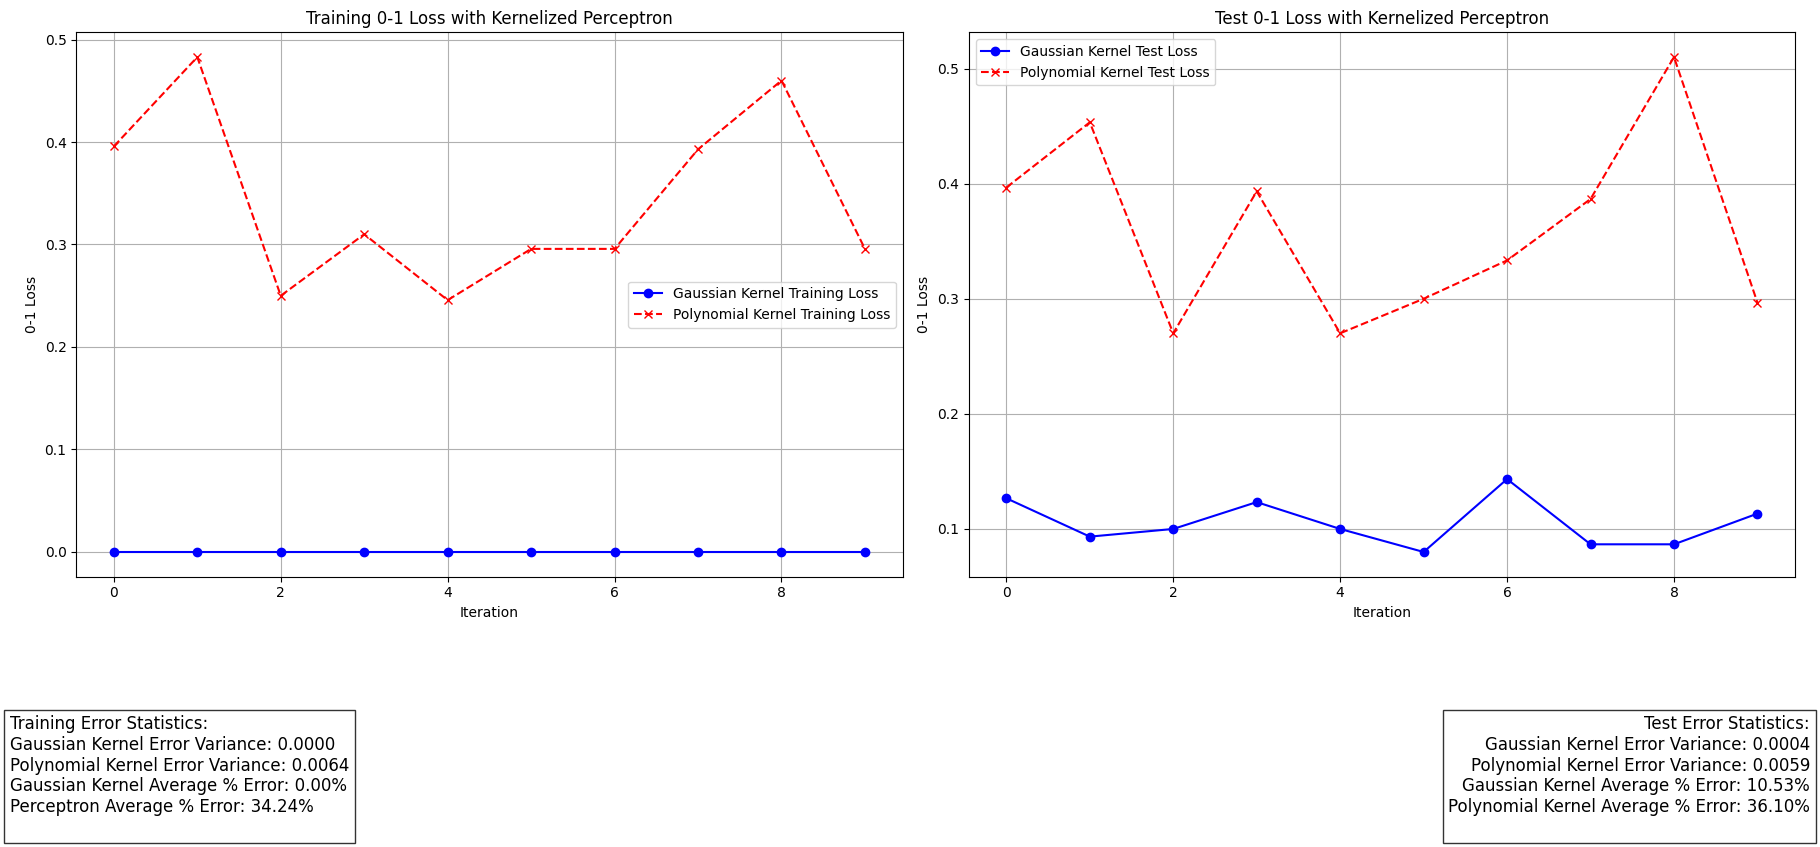

In [24]:
# Calculate variance and average percentage for Gaussian Kernel
variance_zol_training_kernelized_perceptron = np.var(zol_training_kernelized_perceptron)
average_zol_training_kernelized_perceptron_percentage = np.mean(zol_training_kernelized_perceptron) * 100
variance_zol_test_kernelized_perceptron = np.var(zol_test_kernelized_perceptron)
average_zol_test_kernelized_perceptron_percentage = np.mean(zol_test_kernelized_perceptron) * 100

# Calculate variance and average percentage for Polynomial Kernel
variance_zol_training_kernelized_perceptron_poly = np.var(zol_training_kernelized_perceptron_poly)
average_zol_training_kernelized_perceptron_poly_percentage = np.mean(zol_training_kernelized_perceptron_poly) * 100
variance_zol_test_kernelized_perceptron_poly = np.var(zol_test_kernelized_perceptron_poly)
average_zol_test_kernelized_perceptron_poly_percentage = np.mean(zol_test_kernelized_perceptron_poly) * 100

# Plotting
plt.figure(figsize=(18, 8))

# Training Loss Graph
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(zol_training_kernelized_perceptron, marker='o', linestyle='-', color='b', label='Gaussian Kernel Training Loss')
plt.plot(zol_training_kernelized_perceptron_poly, marker='x', linestyle='--', color='r', label='Polynomial Kernel Training Loss')

plt.title('Training 0-1 Loss with Kernelized Perceptron')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()

# Test Loss Graph
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(zol_test_kernelized_perceptron, marker='o', linestyle='-', color='b', label='Gaussian Kernel Test Loss')
plt.plot(zol_test_kernelized_perceptron_poly, marker='x', linestyle='--', color='r', label='Polynomial Kernel Test Loss')

plt.title('Test 0-1 Loss with Kernelized Perceptron')
plt.xlabel('Iteration')
plt.ylabel('0-1 Loss')
plt.grid(True)
plt.legend()

plt.figtext(0, 0.1,
            f'Training Error Statistics:\n'
            f'Gaussian Kernel Error Variance: {variance_zol_training_kernelized_perceptron:.4f}\n'
            f'Polynomial Kernel Error Variance: {variance_zol_training_kernelized_perceptron_poly:.4f}\n'
            f'Gaussian Kernel Average % Error: {average_zol_training_kernelized_perceptron_percentage:.2f}%\n'
            f'Perceptron Average % Error: {average_zol_training_kernelized_perceptron_poly_percentage:.2f}%\n',
            ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.figtext(1, 0.1,
            f'Test Error Statistics:\n'
            f'Gaussian Kernel Error Variance: {variance_zol_test_kernelized_perceptron:.4f}\n'
            f'Polynomial Kernel Error Variance: {variance_zol_test_kernelized_perceptron_poly:.4f}\n'
            f'Gaussian Kernel Average % Error: {average_zol_test_kernelized_perceptron_percentage:.2f}%\n'
            f'Polynomial Kernel Average % Error: {average_zol_test_kernelized_perceptron_poly_percentage:.2f}%\n',
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to provide extra space for annotations
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjusts subplot parameters to fit the text

# Show the plots
plt.show()